In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kaggle import api
from pathlib import Path
from shutil import unpack_archive

Setup và tải data

In [2]:
comp = 'bluebook-for-bulldozers'
path = Path('..') / 'data'

In [3]:
if not path.exists():
    path.mkdir(parents=True)
    api.competition_download_cli(comp, path=path)
    unpack_archive(str(path/f'{comp}.zip'), str(path))

In [4]:
[p.name for p in path.iterdir()]

['bluebook-for-bulldozers.zip',
 'Data Dictionary.xlsx',
 'Machine_Appendix.csv',
 'Test.csv',
 'Train.7z',
 'Train.zip',
 'TrainAndValid.7z',
 'TrainAndValid.csv',
 'TrainAndValid.zip',
 'Valid.7z',
 'Valid.csv',
 'Valid.zip',
 'ValidSolution.csv',
 'median_benchmark.csv',
 'random_forest_benchmark_test.csv']

In [5]:
df = pd.read_csv('../data/TrainAndValid.csv', low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(412698, 53)

In [7]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

Hầu hết các cột đang có kiểu dữ liệu chuỗi (object), chúng ta nên chuyển chúng sang kiểu dữ liệu category.

để ý cột saledate, nó nên có kiểu datetime.

In [9]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

Cột nào có nhiều hơn 90% giá trị khuyết?

In [10]:
n = df.shape[0]
[col for col in df.columns if (df[col].isna().sum()/n) > 0.9]

['Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Pushblock',
 'Scarifier',
 'Tip_Control']

In [11]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [12]:
df.select_dtypes(include='number').isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
dtype: int64

In [13]:
median_hours = df['MachineHoursCurrentMeter'].median()
df['MachineHoursCurrentMeter'] = df['MachineHoursCurrentMeter'].fillna(median_hours)
df['MachineHoursCurrentMeter'].isna().sum()

np.int64(0)

In [14]:
df['saledate'] = pd.to_datetime(df['saledate'])
df.sort_values(by='saledate', inplace=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

Phân phối của cột `SalePrice`. Nó có bị lệch không? Có tồn tại giá trị ngoại lai không?

<Axes: xlabel='SalePrice', ylabel='Count'>

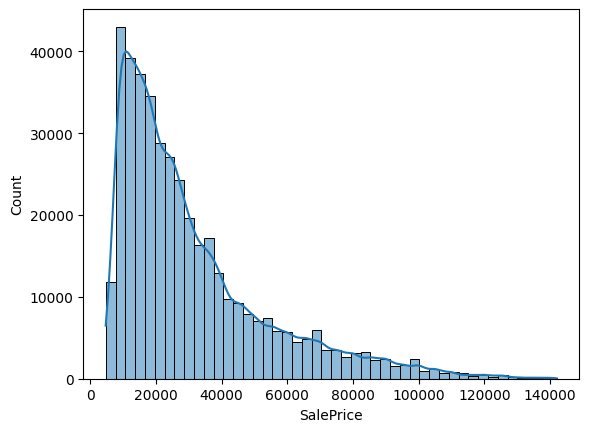

In [15]:
sns.histplot(df['SalePrice'], kde=True, binwidth=3000)

Phân phối của `SalePrice` bị lệch phải, điều này hoàn toàn hợp lý vì máy ủi mất giá theo thời gian: khi một chiếc máy được đem ra đấu giá sau vài năm sử dụng, giá của nó thường giảm mạnh so với giá gốc. Chỉ một tỉ lệ rất nhỏ trong tập dữ liệu là những chiếc máy gần như mới hoặc được bảo trì tốt với số giờ vận hành thấp, nên các giá trị cao ấy kéo mức trung bình lên, tạo thành đuôi dài về phía bên phải.

Trong cuộc thi này, chỉ số đánh giá là RMSLE (root mean squared log error); phương pháp tốt nhất là áp dụng biến đổi log cho cột SalePrice.

Sau này chúng ta chỉ cần dùng root_mean_square_error

In [16]:
df['SalePrice'] = np.log(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

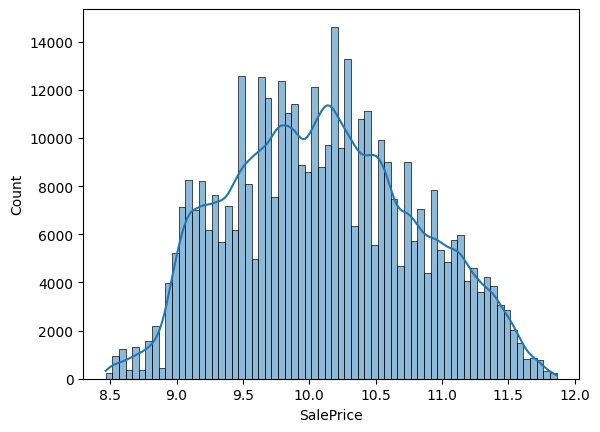

In [17]:
sns.histplot(df['SalePrice'], kde=True, binwidth=0.05)

### Explore Categorical features

In [18]:
cats = df.select_dtypes(include=['object']).columns
cats

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [19]:
df[cats].nunique()

UsageBand                     3
fiModelDesc                5059
fiBaseModel                1961
fiSecondaryDesc             177
fiModelSeries               123
fiModelDescriptor           140
ProductSize                   6
fiProductClassDesc           74
state                        53
ProductGroup                  6
ProductGroupDesc              6
Drive_System                  4
Enclosure                     6
Forks                         2
Pad_Type                      4
Ride_Control                  3
Stick                         2
Transmission                  8
Turbocharged                  2
Blade_Extension               2
Blade_Width                   6
Enclosure_Type                3
Engine_Horsepower             2
Hydraulics                   12
Pushblock                     2
Ripper                        4
Scarifier                     2
Tip_Control                   3
Tire_Size                    17
Coupler                       3
Coupler_System                2
Grouser_

Có một vài cột có số lượng giá trị khác nhau rất lớn (độ đa dạng cao) như `fiModeDesc`, `fiBaseModel`, …, trong khi có những cột chỉ có số lượng giá trị khác nhau thấp như `Stick`, `Fork`, `UsageBand`, `ProductGroup`, …

Phân phối tần suất của một số cột phân loại quan trọng như thế nào?

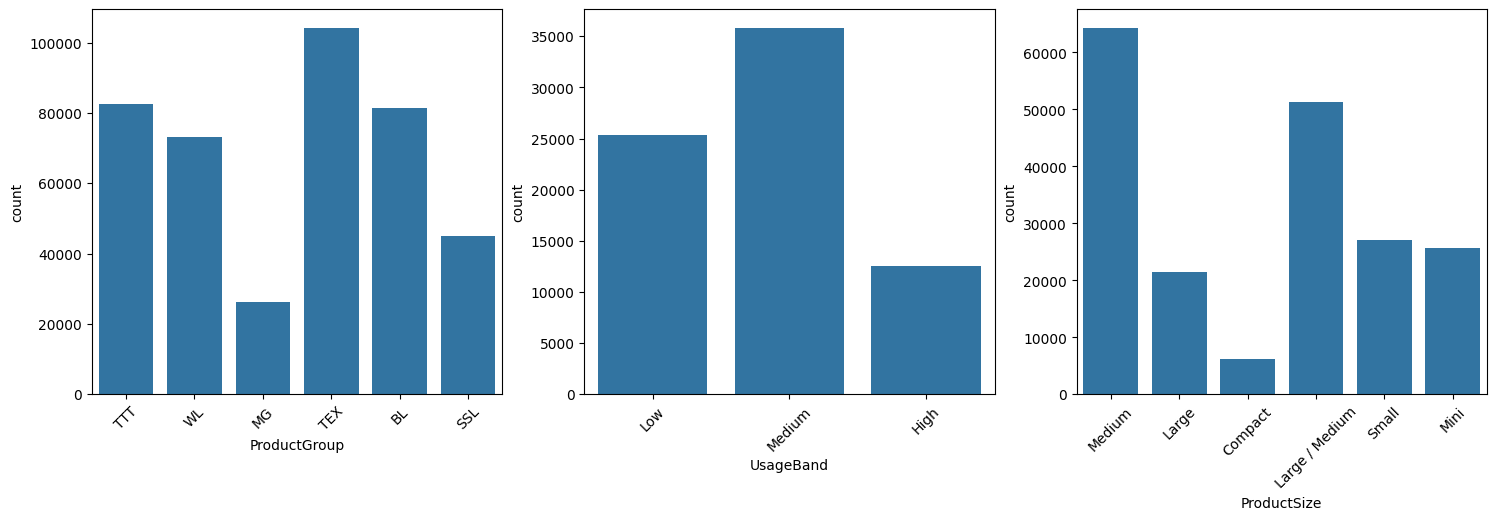

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
cols = ['ProductGroup', 'UsageBand', 'ProductSize']
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
plt.show()

* **ProductGroup**:

  * Phổ biến nhất: TEX (Track Excavators) là nhóm sản phẩm xuất hiện nhiều nhất, với hơn 100.000 máy.
  * Ít phổ biến nhất: MG (Motor Graders) là nhóm ít máy nhất, khoảng 25.000–30.000 máy.
  * Các nhóm khác như WL (Wheel Loader), BL (Backhoe Loader) và TTT (Track Type Tractor) cũng có số lượng đáng kể.

* **UsageBand**:

  * Phổ biến nhất: “Medium” (sử dụng vừa phải) chiếm ưu thế, với hơn 35.000 bản ghi.
  * Ít phổ biến nhất: “High” (sử dụng cao) chỉ khoảng 12.500 bản ghi.
  * “Low” (sử dụng thấp) nằm ở mức trung gian.

* **ProductSize**:

  * Phổ biến nhất: “Medium” (cỡ vừa) xuất hiện nhiều nhất, với hơn 60.000 máy.
  * Ít phổ biến nhất: “Compact” (nhỏ gọn) dưới 10.000 máy.
  * Các kích cỡ Small, Large / Medium, Mini và Large lần lượt nằm giữa, trong đó Large / Medium là kích cỡ phổ biến thứ hai.

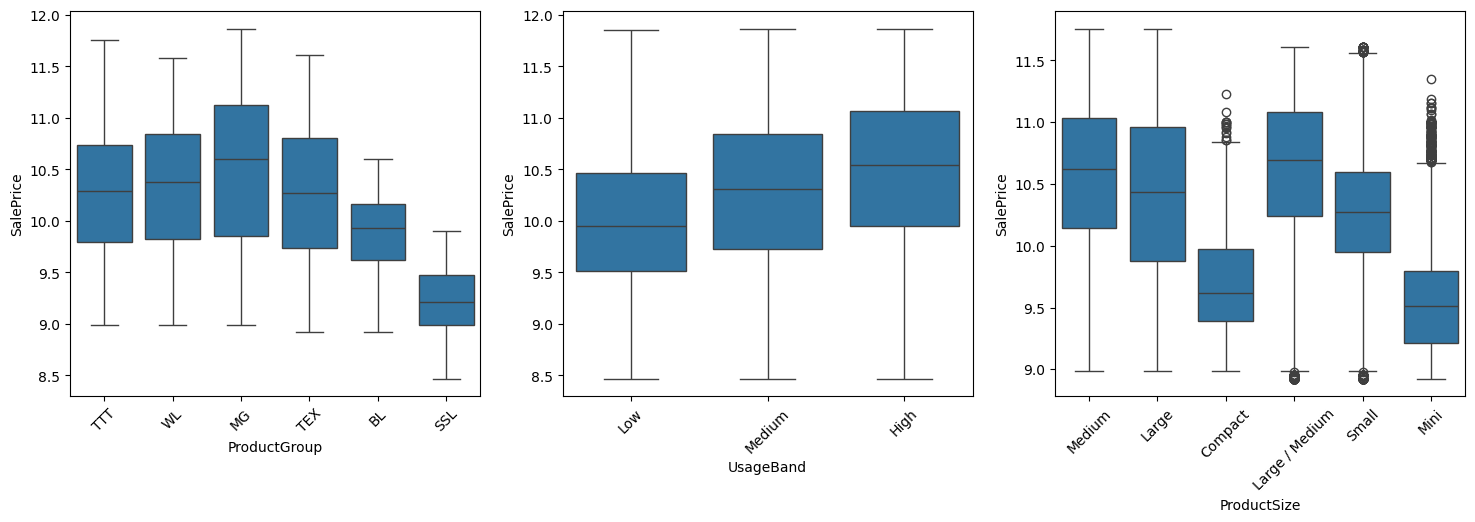

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, y='SalePrice', ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
plt.show()

* **ProductGroup vs. SalePrice**: Giá trị trung vị của `SalePrice` thay đổi đáng kể giữa các nhóm sản phẩm khác nhau. Phạm vi giá (spread) cũng có sự chênh lệch.

* **UsageBand vs. SalePrice**: Có một xu hướng rõ rệt. Ban đầu ta có thể nghĩ rằng mức sử dụng cao hơn đồng nghĩa với hao mòn nhiều hơn, dẫn đến giá bán thấp hơn. Tuy nhiên, nó cũng có thể cho thấy đây là những máy móc có khả năng cao hơn, được ưa chuộng hơn, hoặc `UsageBand` phản ánh việc sử dụng tích cực ngay trước khi bán.

* **ProductSize vs. SalePrice**: Mối quan hệ rất rõ ràng.

Vì vậy, thứ tự của các mức `UsageBand` và `ProductSize` ở đây là quan trọng, nên ta sẽ chuyển chúng sang kiểu dữ liệu phân loại (categorical) với thứ tự phù hợp.

In [22]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'].cat.set_categories(sizes, ordered=True)

205615    Medium
274835       NaN
141296     Large
212552       NaN
62755        NaN
           ...  
410879       NaN
412476       NaN
411927      Mini
407124       NaN
409203       NaN
Name: ProductSize, Length: 412698, dtype: category
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Mini' < 'Compact']

In [23]:
bands = ['Low', 'Medium', 'High']
df['UsageBand'] = df['UsageBand'].astype('category').cat.set_categories(bands, ordered=True)

### Explore numerical features

In [24]:
exclude =['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'auctioneerID']
num_cols = df.drop(exclude, axis=1).select_dtypes(include='number').columns.to_list()
num_cols

['datasource', 'YearMade', 'MachineHoursCurrentMeter']

In [25]:
df[num_cols].describe()

,datasource,YearMade,MachineHoursCurrentMeter
count,412698.000000,412698.000000,4.126980e+05
mean,135.169361,1899.049637,1.259165e+03
std,9.646749,292.190243,1.633077e+04
min,121.000000,1000.000000,0.000000e+00
25%,132.000000,1985.000000,0.000000e+00
50%,132.000000,1995.000000,0.000000e+00
75%,136.000000,2001.000000,0.000000e+00
max,173.000000,2014.000000,2.483300e+06


`MachineHoursCurrentMeter`: Ta thấy giá trị `min`, `q1` và `q2` đều bằng 0. Đây là điều đáng chú ý, bởi ít nhất một nửa số máy trong tập dữ liệu đều có số giờ vận hành là 0. Điều này cho thấy nhiều máy còn mới hoặc thực sự chưa được sử dụng.

<Axes: xlabel='MachineHoursCurrentMeter', ylabel='Count'>

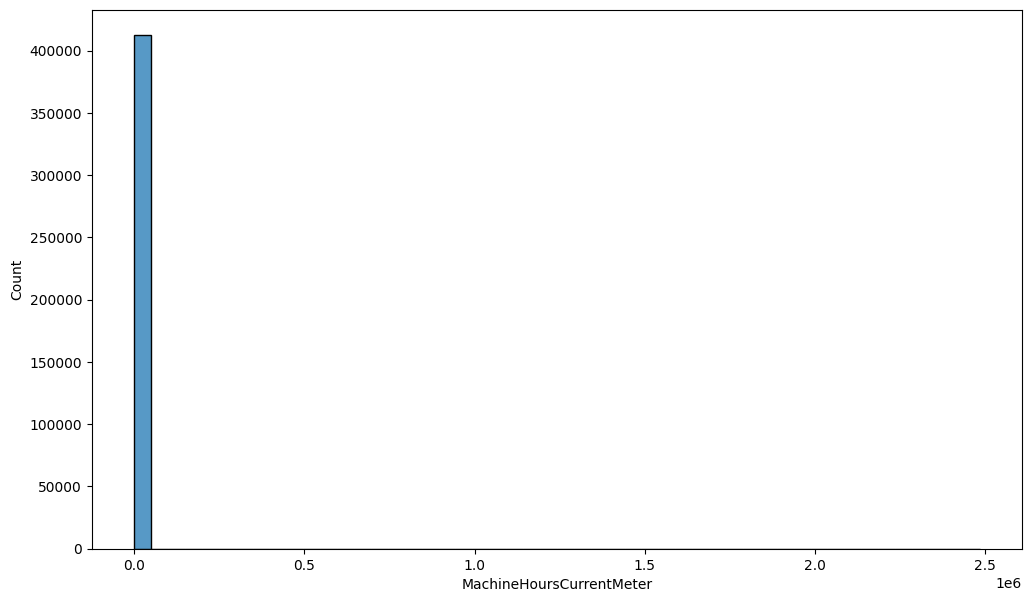

In [26]:
plt.figure(figsize=(12, 7))
sns.histplot(df['MachineHoursCurrentMeter'], kde=False, bins=50) # dropna() just in case of NaNs

Vì hầu hết các máy có số giờ ghi nhận bằng 0, nên rất khó để nhìn rõ phân phối trên biểu đồ; vì vậy chúng ta sẽ loại bỏ các máy 0 giờ và áp dụng phép log cho những máy còn lại để quan sát phân phối.

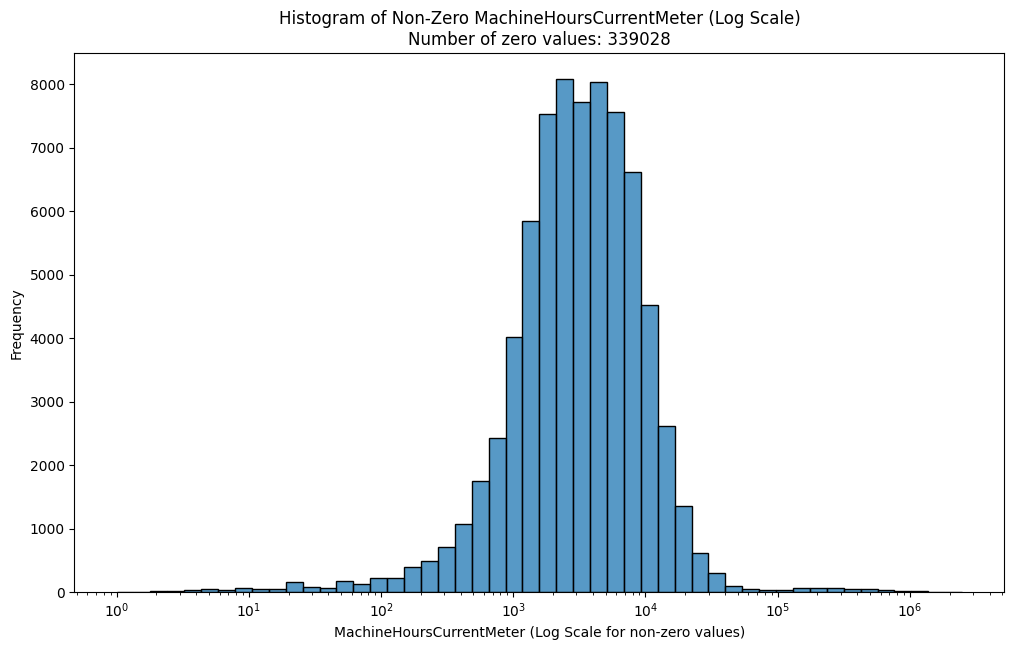

In [27]:
non_zero_hours = df[df['MachineHoursCurrentMeter'] > 0]['MachineHoursCurrentMeter']
num_zeros = df[df['MachineHoursCurrentMeter'] == 0]['MachineHoursCurrentMeter'].count()

plt.figure(figsize=(12, 7))
sns.histplot(non_zero_hours, kde=False, bins=50, log_scale=True) # log_scale on x-axis
plt.title(f'Histogram of Non-Zero MachineHoursCurrentMeter (Log Scale)\nNumber of zero values: {num_zeros}')

plt.xlabel('MachineHoursCurrentMeter (Log Scale for non-zero values)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='MachineHoursCurrentMeter', ylabel='Count'>

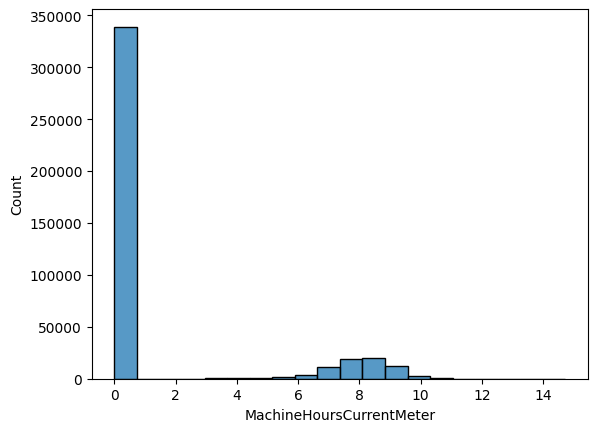

In [28]:
hour_log = np.log(df['MachineHoursCurrentMeter'] + 1)
sns.histplot(hour_log, kde=False)

`YearMade`: ta thấy giá trị nhỏ nhất của `YearMade` là 1000, điều này nhiều khả năng không  là năm sản xuất thực sự của một chiếc máy ủi được bán gần đây; có lẽ đó chỉ là giá thay thế cho những năm bị thiếu/không xác định, và chúng ta sẽ cần xử lý vấn đề này sau.


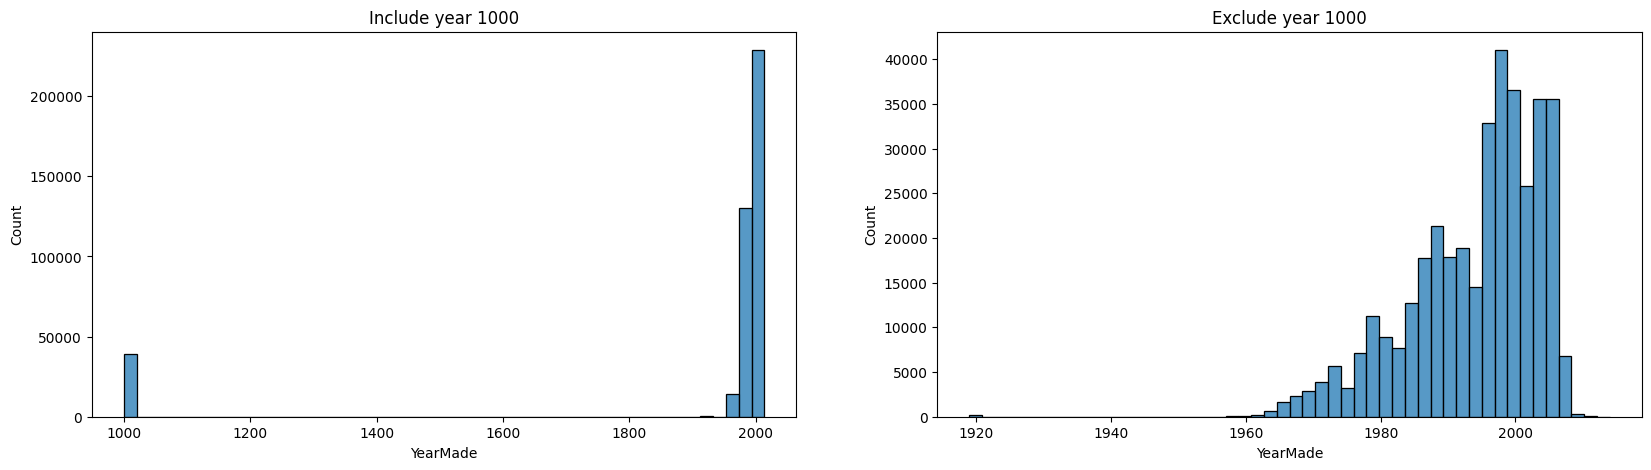

In [29]:
fig, axe = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(df['YearMade'], kde=False, bins=50, ax=axe[0])
axe[0].set_title('Include year 1000')
exclude_1000 = df[df['YearMade'] > 1000]['YearMade']
sns.histplot(exclude_1000, kde=False, bins=50, ax=axe[1])
axe[1].set_title('Exclude year 1000')
plt.show()

<Axes: xlabel='YearMade', ylabel='Count'>

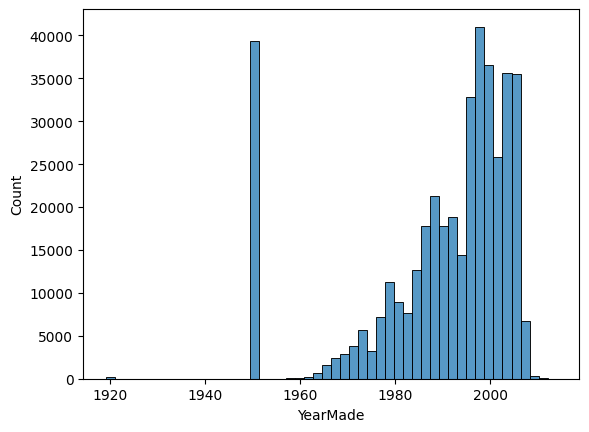

In [30]:
df.loc[df['YearMade'] < 1900, 'YearMade'] = 1950
sns.histplot(df['YearMade'], kde=False, bins=50)

Chúng ta thấy giá trị lớn nhất của `YearMade` là 2014, điều này khá bất thường vì cuộc thi được tổ chức vào năm 2013, và theo mô tả dữ liệu thì ngày bán cuối cùng của tập Test là tháng 11 năm 2012. Vậy hãy xem xét các bản ghi có `YearMade` sau năm 2012.

In [31]:
df[df['YearMade'].isin([2012, 2013, 2014])]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
295706,2226857,10.463103,40066,4125,136,1.0,2012,4534.0,Low,2010-05-06,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
395524,6275685,10.915088,156521,1453,149,1.0,2013,0.0,NaN,2011-12-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
409039,6282827,10.404263,1927533,1931,149,2.0,2014,0.0,NaN,2012-01-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410474,6294577,10.434116,1845767,11742,149,0.0,2014,0.0,NaN,2012-03-22,...,None or Unspecified,None or Unspecified,Manual,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN


chuyển đổi cột `saledate` sang kiểu dữ liệu datetime, sau đó lọc ra những dòng mà `YearMade` lớn hơn năm trong `saledate`.

In [32]:
idx = df['YearMade'] > df['saledate'].dt.year
df[idx]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
251546,1766755,11.512925,1241578,457,132,6.0,2002,0.0,NaN,1995-08-11,...,None or Unspecified,"10' 6""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
213253,1672382,9.392662,1151751,4988,132,4.0,2008,0.0,NaN,1996-02-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206920,1656135,10.184900,1229496,8559,132,1.0,1998,0.0,NaN,1996-02-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231762,1725834,10.021271,1106818,8954,132,1.0,2006,0.0,NaN,1996-07-16,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
27786,1256766,10.203592,1424836,3247,132,2.0,1997,0.0,NaN,1996-12-13,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
176543,1607397,11.184421,1104056,4753,132,11.0,1998,0.0,NaN,1997-05-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
242681,1748962,10.203592,1361981,257,132,6.0,2008,0.0,NaN,1997-12-15,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81843,1380049,10.275051,1189094,3538,132,1.0,2000,0.0,NaN,1999-10-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209191,1662009,9.047821,1481256,14755,132,2.0,2008,0.0,NaN,2001-10-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161311,1582210,11.002100,1482307,28842,132,1.0,2006,0.0,NaN,2005-02-15,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


Có 15 bản ghi như vậy, và câu hỏi đặt ra là: đây có thực sự là lỗi nhập liệu, hay việc bán một sản phẩm trước khi nó được sản xuất có thể xảy ra trong các phiên đấu giá? Mình nghĩ đây là lỗi nhập liệu, nhưng vì không phải chuyên gia về đấu giá nên mình đã hỏi GPT. Kết quả cho thấy các phiên đấu giá này chủ yếu dành cho máy móc hiện có, đã qua sử dụng. Một số bản ghi trong số đó thậm chí có `YearMade` muộn hơn `saledate` rất nhiều (ví dụ: `YearMade` là 2008 nhưng `saledate` lại là 2001, hoặc `saledate` là 1996).

Vậy nên, chúng ta có thể xoá những dòng sai lệch đó, hoặc cập nhật `YearMade` của chúng bằng với năm trong `saledate`.

In [33]:
df.loc[idx, 'YearMade'] = df.loc[idx, 'saledate'].dt.year

<Axes: xlabel='YearMade', ylabel='SalePrice'>

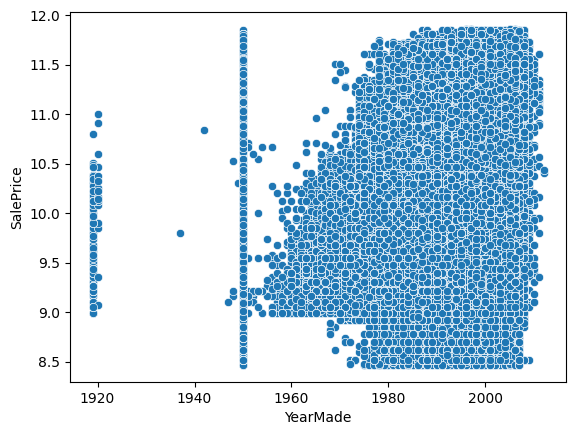

In [34]:
sns.scatterplot(x=df['YearMade'], y=df['SalePrice'])

<Axes: xlabel='YearMade', ylabel='SalePrice'>

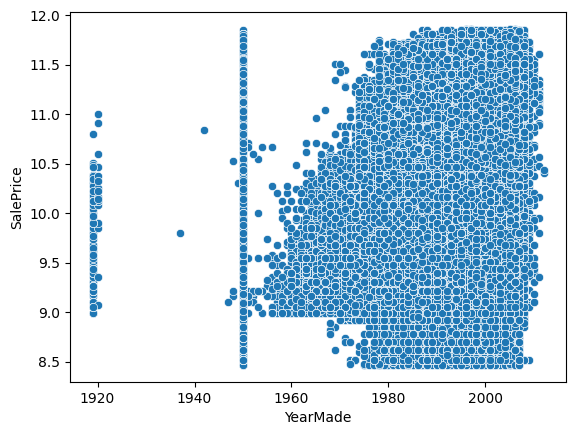

In [35]:
sns.scatterplot(x=df['YearMade'], y=df['SalePrice'])

Có một xu hướng rõ ràng: khi `YearMade` tăng lên (tức là máy mới hơn), thì `SalePrice` cũng có xu hướng cao hơn — điều này khá trực quan. Độ phân tán của `SalePrice` cũng có vẻ lớn hơn đối với các máy đời mới.

Ngoài ra, có một cụm điểm dọc khá rõ ràng quanh `YearMade` = 1920. Điều này có thể cho thấy rằng `1920` được dùng như một giá trị mặc định hoặc thay thế cho những máy rất cũ mà năm sản xuất chính xác không được biết. Tương tự như cách `1000` được dùng trước đó, điều này có thể do tập dữ liệu được tổng hợp từ nhiều nguồn khác nhau.

Các máy cũ thường sẽ có giá thấp hơn

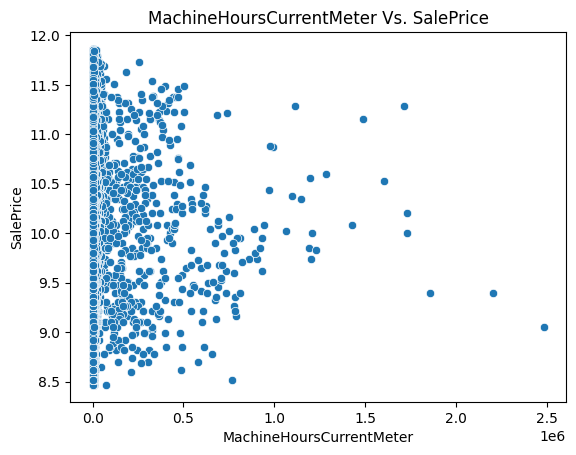

In [36]:
sns.scatterplot(x=df['MachineHoursCurrentMeter'], y=df['SalePrice'])
plt.title("MachineHoursCurrentMeter Vs. SalePrice")
plt.show()

Vì dữ liệu bị lệch và có nhiều giá trị 0 giờ, rất khó để đọc biểu đồ, nên chúng ta hãy cân nhắc áp dụng biến đổi log.

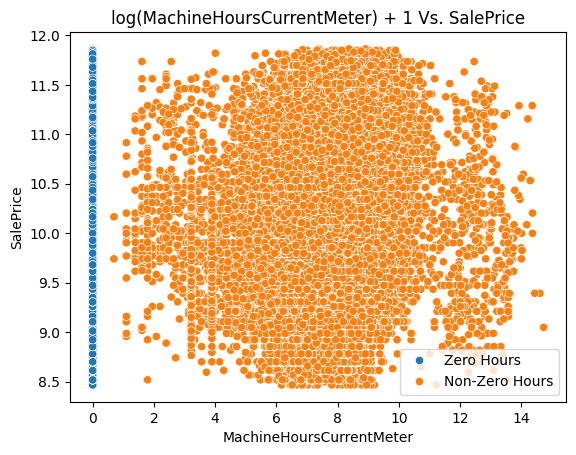

In [37]:
sns.scatterplot(x=np.log(df['MachineHoursCurrentMeter'] + 1), y=df['SalePrice'],
                hue=np.where(df['MachineHoursCurrentMeter'] == 0, 'Zero Hours', 'Non-Zero Hours'))
plt.title("log(MachineHoursCurrentMeter) + 1 Vs. SalePrice")
plt.show()


Máy có số giờ ghi nhận là 0 lại cho thấy khoảng biến động giá `SalePrice` rất rộng. Đây là một quan sát quan trọng. Nó cho thấy “0 giờ” không đồng nghĩa với “mới tinh và đắt tiền” hay “rẻ”. Điều này có thể nghĩa là máy thực sự mới, hoặc đơn giản là giờ hoạt động chưa được ghi (tức dữ liệu bị thiếu). Giá bán của những máy này nhiều khả năng phụ thuộc vào các yếu tố khác như `YearMade`, `ProductGroup`,

Trong khi đó, với các máy có giờ vận hành khác 0 (các chấm màu xanh), có xu hướng giảm nhẹ: khi `MachineHoursCurrentMeter` tăng lên, `SalePrice` có khuynh hướng giảm. Tuy nhiên, mối liên hệ này không quá mạnh và có nhiều biến động, cho thấy mặc dù số giờ có ảnh hưởng nhất định, nhưn...g không phải là nhân tố duy nhất hay mạnh nhất quyết định giá của những máy đã được sử dụng.

Trong khi một số đặc trưng số như `YearMade` cho thấy xu hướng chung với `SalePrice`, mối quan hệ này không hoàn toàn tuyến tính và có nhiều biến động. Do đó, các mô hình tree-based như Random Forest, các thuật toán Gradient Boosting như XGBoost… rất được ưa chuộng cho những bộ dữ liệu kiểu này, vì chúng có thể nắm bắt các mẫu phức tạp hơn. Chúng ta sẽ bàn kỹ hơn về vấn đề này sau.

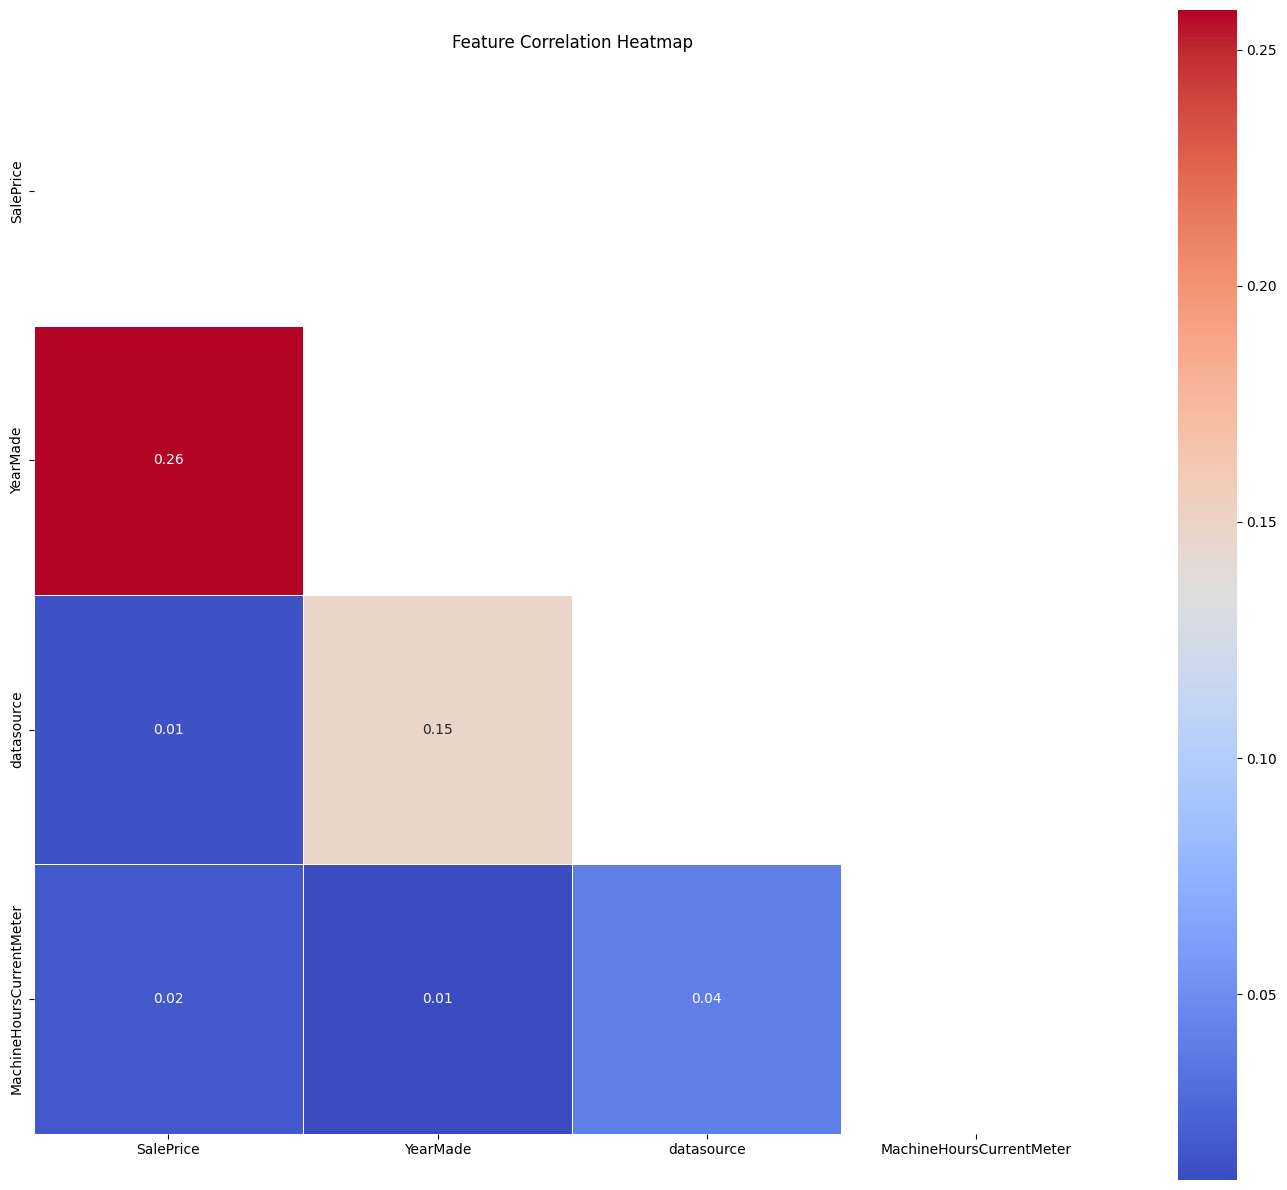

In [38]:
plt.figure(figsize=(14, 12))
corr = df[['SalePrice', 'YearMade', 'datasource', 'MachineHoursCurrentMeter']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths='.5')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

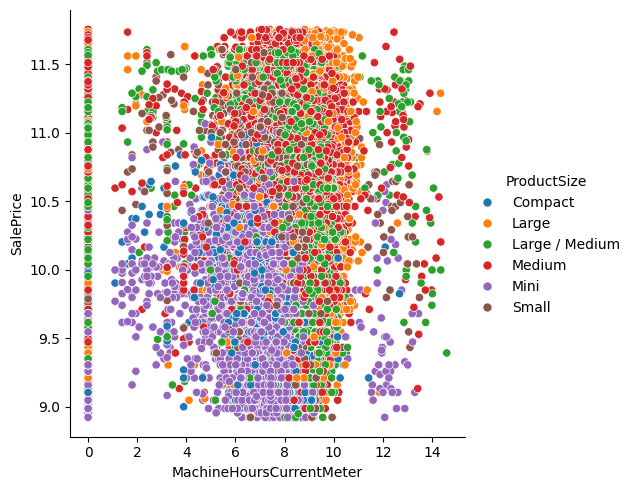

In [39]:
sns.relplot(x=np.log1p(df['MachineHoursCurrentMeter']), y=df['SalePrice'], kind='scatter',
            hue=df['ProductSize']);

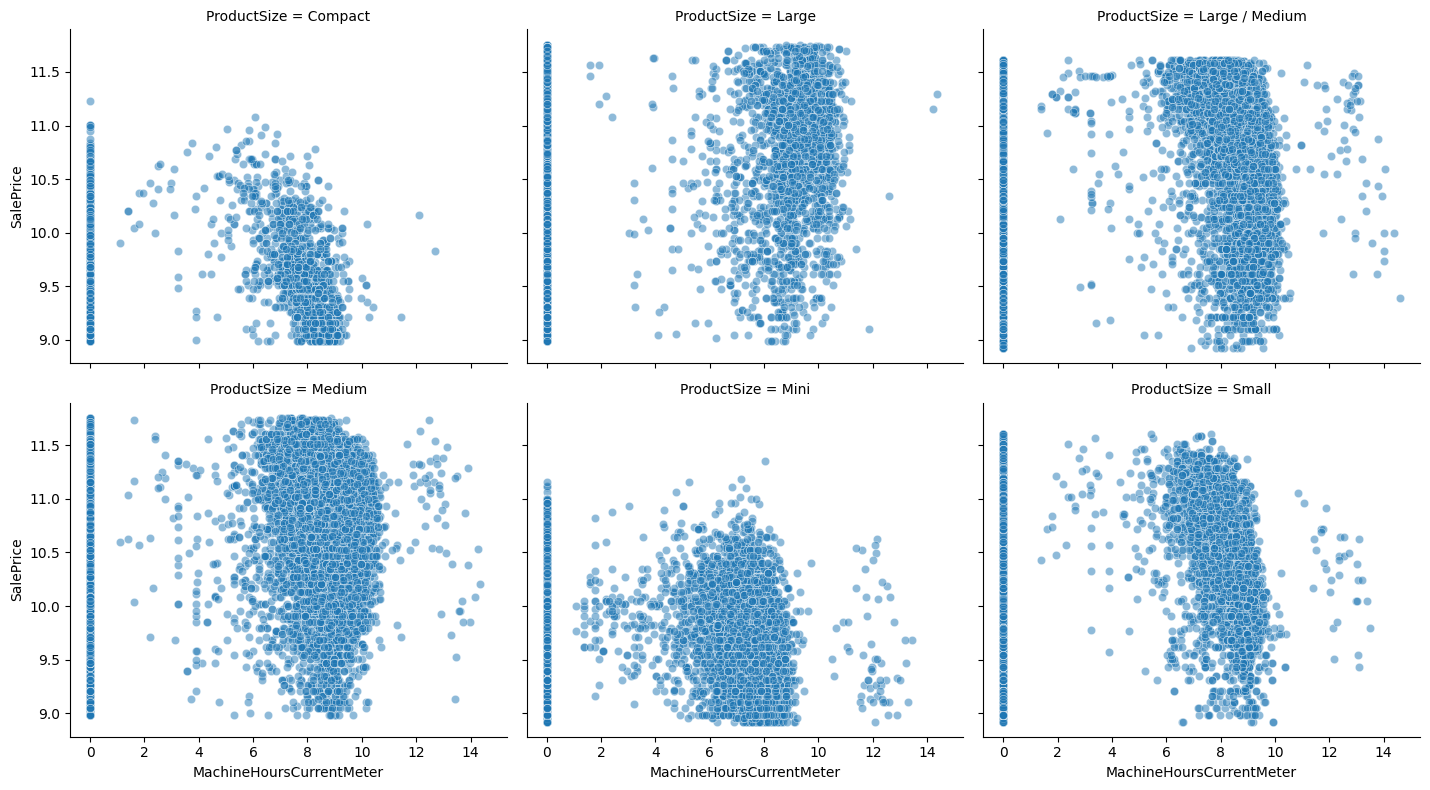

In [40]:
sns.relplot(x=np.log1p(df['MachineHoursCurrentMeter']), y=df['SalePrice'], kind='scatter',
            col='ProductSize', col_wrap=3, alpha=0.5, height=4, aspect=1.2, data=df);

- Xu hướng chung: Đối với hầu hết các nhóm kích cỡ máy (Compact, Medium, Mini, Small), có mối tương quan âm rõ rệt: khi số giờ vận hành tăng, giá bán có xu hướng giảm. Điều này khá trực quan.
- Large & Large/Medium: Với các máy “Large” và “Large / Medium”, mối liên hệ giữa số giờ và giá bán kém rõ nét hơn hoặc phân tán rộng hơn. Giá bán nhìn chung cao hơn, và có thể các yếu tố khác đóng vai trò chủ đạo, hoặc tác động của giờ máy chỉ nhẹ hơn.
- Khoảng giá: Các nhóm kích cỡ máy khác nhau chiếm các khoảng giá `SalePrice` khác biệt rõ ràng, đúng như mong đợi.

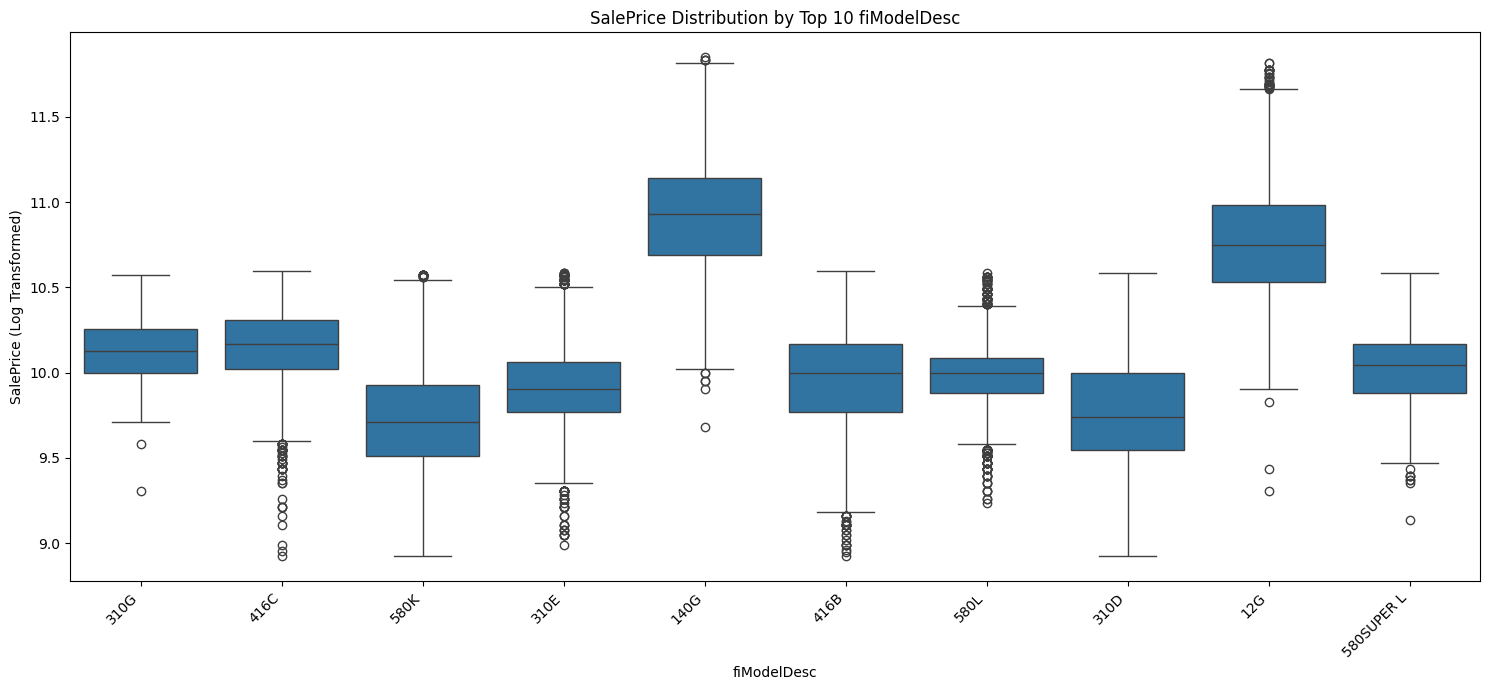

In [41]:
top_categories = df['fiModelDesc'].value_counts().nlargest(10).index
df_top_categories = df[df['fiModelDesc'].isin(top_categories)]

plt.figure(figsize=(15, 7))
sns.boxplot(x='fiModelDesc', y='SalePrice', data=df_top_categories, order=top_categories)
plt.xticks(rotation=45, ha='right')
plt.title(f'SalePrice Distribution by Top {10} fiModelDesc')
plt.xlabel('fiModelDesc')
plt.ylabel('SalePrice (Log Transformed)')
plt.tight_layout()
plt.show()

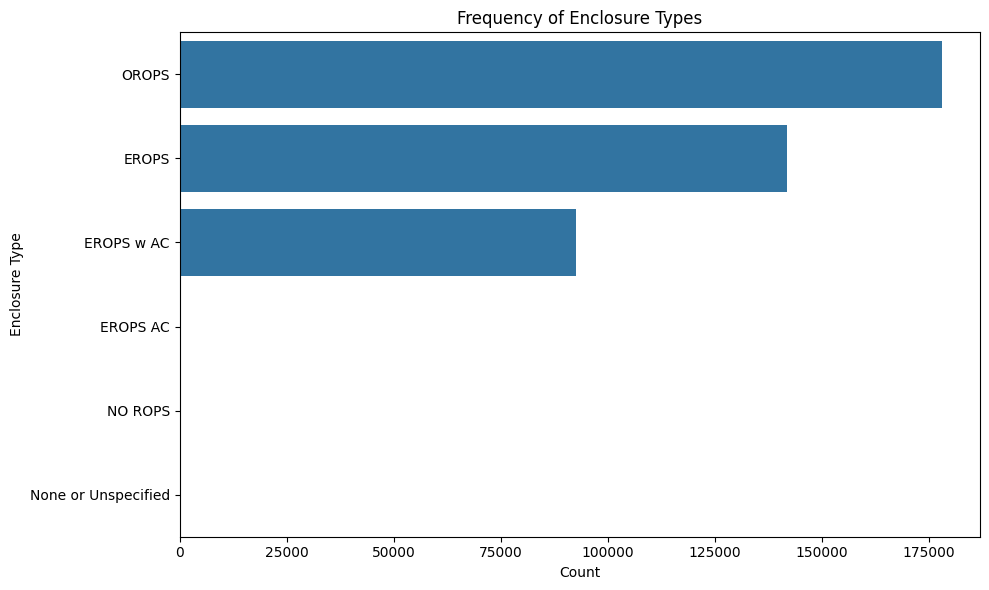

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Enclosure', data=df, order = df['Enclosure'].value_counts().index) # Order by frequency
plt.title('Frequency of Enclosure Types')
plt.xlabel('Count')
plt.ylabel('Enclosure Type')
plt.tight_layout()
plt.show()

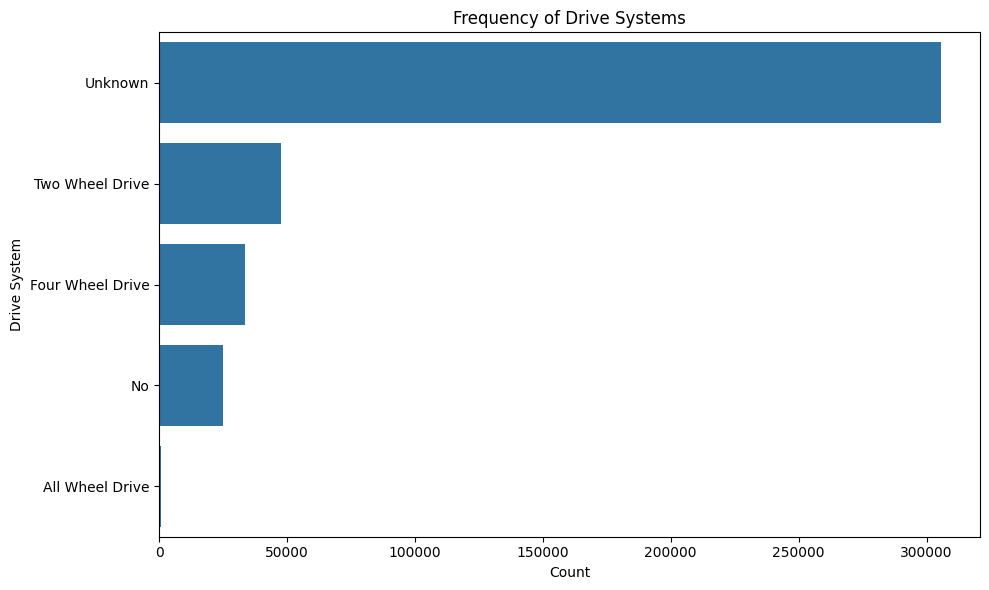

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Drive_System', data=df.fillna({'Drive_System': 'Unknown'}), order = df.fillna({'Drive_System': 'Unknown'})['Drive_System'].value_counts().index)
plt.title('Frequency of Drive Systems')
plt.xlabel('Count')
plt.ylabel('Drive System')
plt.tight_layout()
plt.show()

### Dealing with TimeSeries Data(`saledate`)

Để giúp thuật toán của chúng ta xử lý ngày tháng một cách thông minh hơn, chúng ta không chỉ muốn biết một ngày nào đó sớm hơn hay muộn hơn các ngày khác, mà còn có thể dựa vào ngày trong tuần, xem đó có phải ngày lễ hay không, tháng nào, v.v. Để làm được điều này, ta sẽ thay thế mỗi cột ngày thành một tập các cột “metadata” về ngày tháng như: ngày trong tuần, có phải ngày lễ không, tháng, … Các cột này sẽ có kiểu dữ liệu phân loại (categorical)


In [50]:
df['saleYear'] = df.saledate.dt.year
df['saleMonth'] = df.saledate.dt.month
df['saleDay'] = df.saledate.dt.day
df['saleDayOfWeek'] = df.saledate.dt.dayofweek
df['saleDayOfYear'] = df.saledate.dt.dayofyear

Sale Counts Over Time

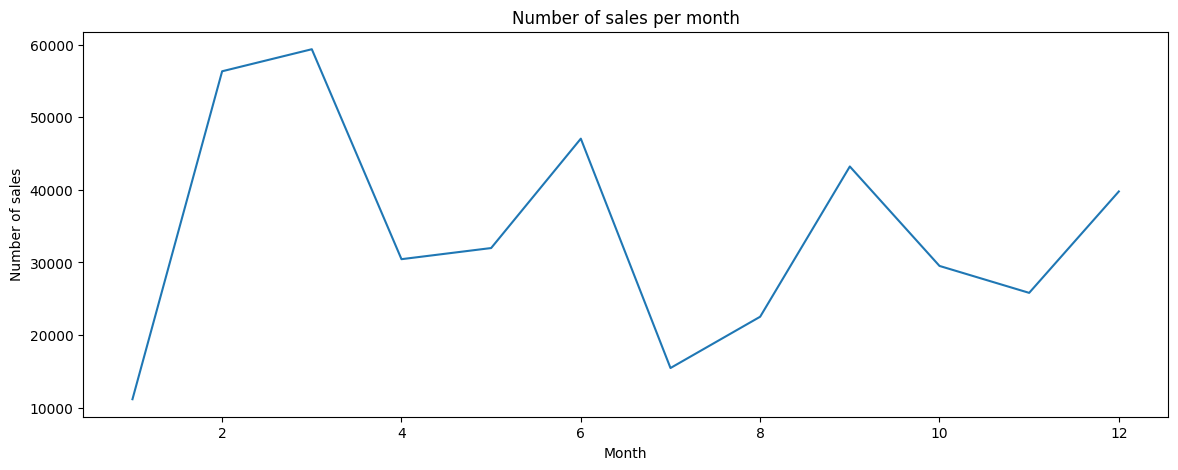

In [46]:
sales_per_month = df.groupby('saleMonth').size()
plt.figure(figsize=(14, 5))
sales_per_month.plot()
plt.title('Number of sales per month')
plt.xlabel('Month')
plt.ylabel('Number of sales')
plt.show()


- Khối lượng bán tăng đột biến vào tháng 2 và tháng 3, sau đó dao động với các đỉnh nhỏ hơn vào tháng 6 và tháng 9.
- Lượng bán thấp nhất vào tháng 1 và tháng 7, có thể do ảnh hưởng mùa vụ hoặc lịch đấu giá.

Average sale price over time

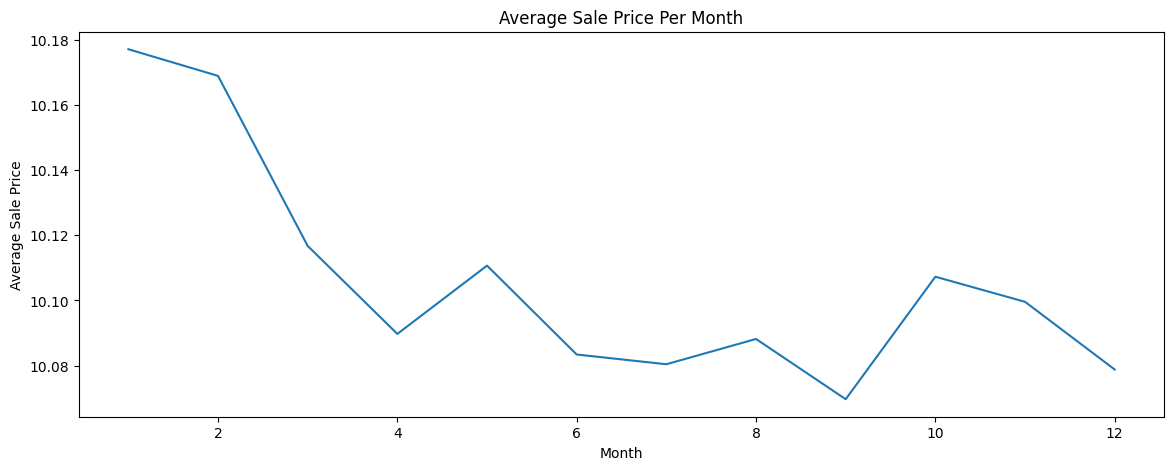

In [47]:
avg_price_per_month = df.groupby('saleMonth')['SalePrice'].mean()
plt.figure(figsize=(14, 5))
avg_price_per_month.plot()
plt.title('Average Sale Price Per Month')
plt.xlabel('Month')
plt.ylabel('Average Sale Price')
plt.show()

- xu hướng giảm nhẹ theo mùa: giá bán trung bình cao hơn vào đầu năm, sau đó giảm và dao động suốt cả năm  
- Điều này có thể cho thấy nhu cầu cao hơn về các loại thiết bị khác nhau được bán vào đầu năm

<Figure size 1000x600 with 0 Axes>

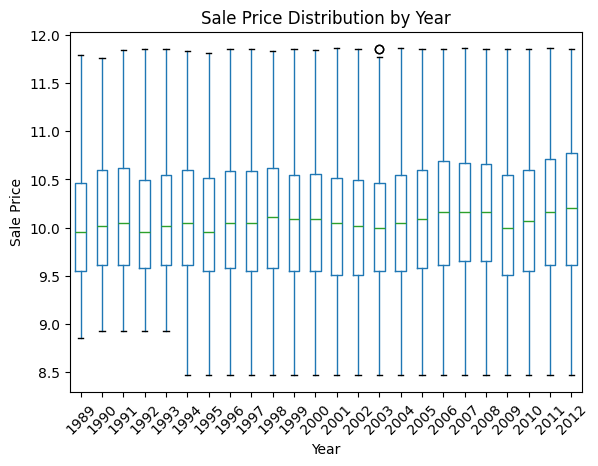

In [49]:
plt.figure(figsize=(10, 6))
df.boxplot(column='SalePrice', by='saleYear', grid=False)
plt.title('Sale Price Distribution by Year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

- Giá bán trung bình (theo thang log) tương đối ổn định qua các năm, chỉ có một vài dao động nhỏ.  
- Có một vài giá trị ngoại lai, nhưng nhìn chung biên độ phân phối (IQR) vẫn giữ ổn định.  
- không có xu hướng tăng hoặc giảm mạnh nào về giá bán theo thời gian.

In [ ]:
sales_by_state_month = df.groupby(['state', 'saleMonth']).size().unstack(fill_value=0)
sales_by_state_month.head()

saleMonth,1,2,3,4,5,6,7,8,9,10,11,12
state,,,,,,,,,,,,
Alabama,472,295,2600,201,361,2146,184,572,1496,250,373,1342
Alaska,2,1,1,6,31,149,25,98,23,52,33,9
Arizona,53,2113,469,558,1223,757,249,413,1675,109,1300,445
Arkansas,68,285,186,905,86,501,116,545,79,647,262,253
California,382,2033,4592,1236,2747,3520,1752,2420,3354,1919,1625,4181


In [63]:
top_states = sales_by_state_month.sum(axis=1).sort_values(ascending=False).head(10).index
top_states

Index(['Florida', 'Texas', 'California', 'Washington', 'Georgia', 'Maryland',
       'Mississippi', 'Ohio', 'Illinois', 'Colorado'],
      dtype='object', name='state')

Number of sales per state over time

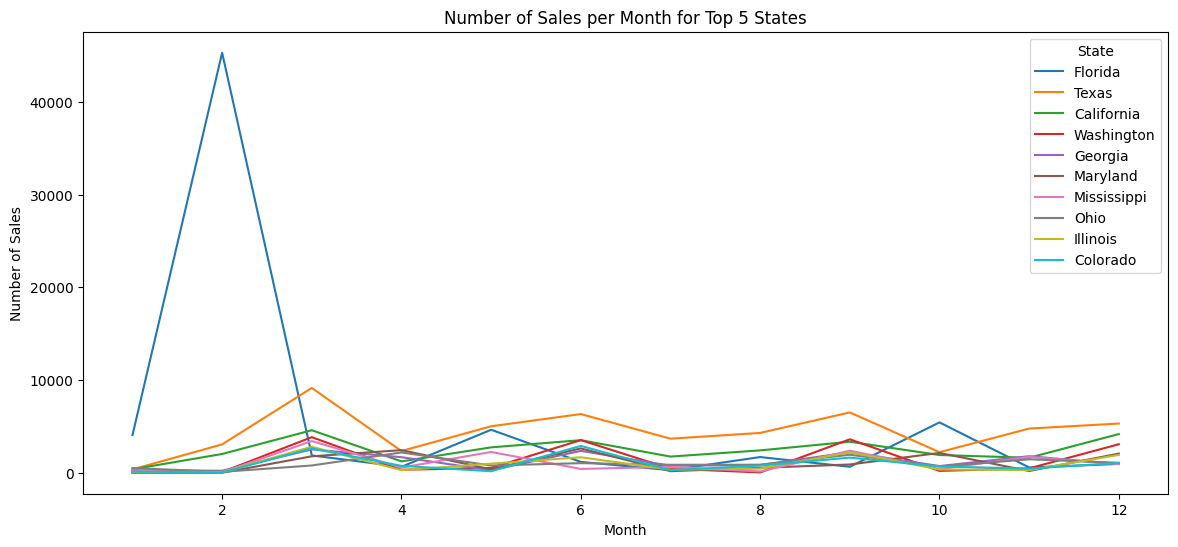

In [64]:
sales_by_state_month.loc[top_states].T.plot(figsize=(14, 6))
plt.title('Number of Sales per Month for Top 5 States')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.legend(title='State')
plt.show()

- Florida có số lượng sale rất lớn vào tháng Hai, có thể do bất thường dữ liệu hoặc một sự kiện đấu giá quy mô lớn  
- các khu vực khác có doanh số ổn định hơn, nhưng vẫn thể hiện tính mùa vụ, với doanh số cao hơn vào các tháng đầu và giữa năm

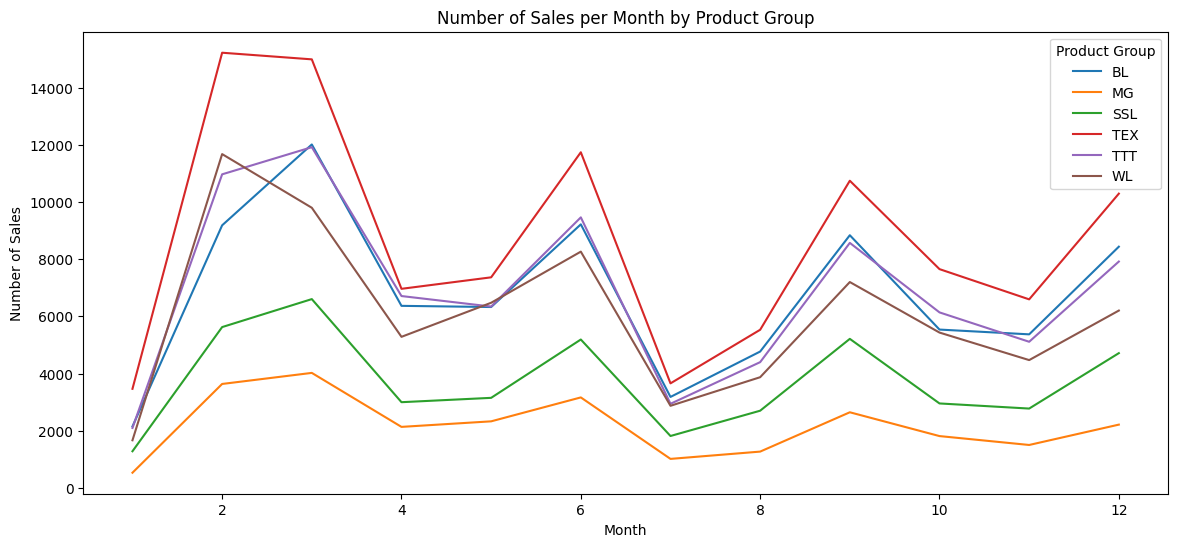

In [66]:
sales_by_pg_month = df.groupby(['ProductGroup', 'saleMonth']).size().unstack(fill_value=0)

sales_by_pg_month.T.plot(figsize=(14, 6))
plt.title('Number of Sales per Month by Product Group')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.legend(title='Product Group')
plt.show()

- TEX(read line) có doanh số cao nhất mỗi tháng, với các đỉnh vào tháng Hai, tháng Ba, tháng Sáu và tháng Chín  
- Những Product Group khác cũng thể hiện các mô hình theo mùa tương tự, nhưng với khối lượng thấp hơn  
- Tất cả các nhóm sản phẩm đều trải qua sự sụt giảm doanh số đáng kể vào khoảng tháng Bảy  